In [2]:
from proj.models import GRUNet
from proj.dataloaders import PoseDataset, collate_fn
from proj.experiment import Experiment
import wandb
import torch.nn as nn
from torch.utils.data import DataLoader
import torch
import pickle as pkl
import os 

c:\Users\liamc\anaconda3\envs\fencing_v3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
device='cuda:0'
ann_file = 'C:\\Users\\liamc\\Desktop\\fencing_vision\\src\\vpd_fencing\\action_dataset\\fencing\\all.txt'
pose_path = 'C:\\Users\\liamc\\Desktop\\fencing_vision\\data\\embeddings\\vipe_embs\\'
val_ids = 'C:\\Users\\liamc\\Desktop\\fencing_vision\\src\\vpd_fencing\\action_dataset\\fencing\\val.ids.txt'
n_shot_file = 'C:\\Users\\liamc\\Desktop\\fencing_vision\\src\\vpd_fencing\\action_dataset\\fencing\\train_16_0.ids.txt'
bs = 8
train_dataloader = DataLoader(PoseDataset(ann_file, pose_path, n_shot_file, subset = ['advancing', 'retreating', 'fleche', 'lunge']),
 collate_fn=collate_fn, batch_size=bs)

Action Item Counts: {'advancing': 16, 'retreating': 16, 'fleche': 16, 'lunge': 16}


In [29]:
pose_file = 'C:\\Users\\liamc\\Desktop\\fencing_vision\\data\\embeddings\\vpd_embs_7\\BARDENET_FRA_vs_CANNONE_FRA__1__left.emb.pkl'
with open(pose_file, 'rb') as f:
    data = pkl.load(f)
f.close()


In [30]:
import matplotlib.pyplot as plt
data_point = data[0][1]

In [38]:
# plt.ion()
# for d in data:
#     plt.scatter(d[1][0, 0:26:2], d[1][0,1:26:2])
#     plt.show()
#     plt.clf()

In [5]:
from vpd_fencing.models.module import FCNet

In [7]:
import torch 
from vpd_fencing.models.module import FCResNetPoseDecoder

In [12]:
device = "cuda"
path = "C:\\Users\\liamc\\Desktop\\fencing_vision\\models\\vpd_model7\\best_epoch.decoder.pt"
model = FCNet(26, [128, 128], 2*26, dropout = 0)
model.load_state_dict(torch.load(path))
model.to(device)

FCNet(
  (layers): Sequential(
    (0): Linear(in_features=26, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): Dropout(p=0, inplace=True)
    (4): ReLU(inplace=True)
    (5): Linear(in_features=128, out_features=52, bias=True)
  )
)

In [16]:
model.eval()
out = model(torch.Tensor(data[0][1]).to(device))

In [48]:
out_pose = out[0, :26].detach().cpu().numpy()

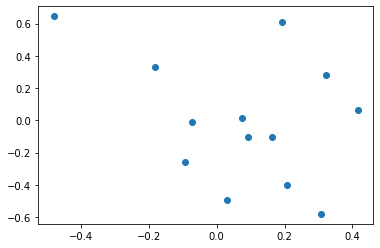

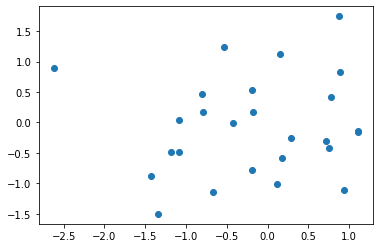

In [55]:
plt.scatter(out_pose[:26:2], out_pose[1:26:2])
plt.show()
plt.scatter(data_point[:26:2], data_point[1:26:2])
plt.show()